# Differentiation in Simple Cases
For simple problems involing differentiation, try using something like [SymPy](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#derivatives) for a symbolic approach. Note that this isn't a good approach to e.g. computing gradients (for that, use [Torch](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) or [JAX](https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html)

# Taylor Expansion
Actually a MacLaurin expansion, since the function is about 0.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import factorial

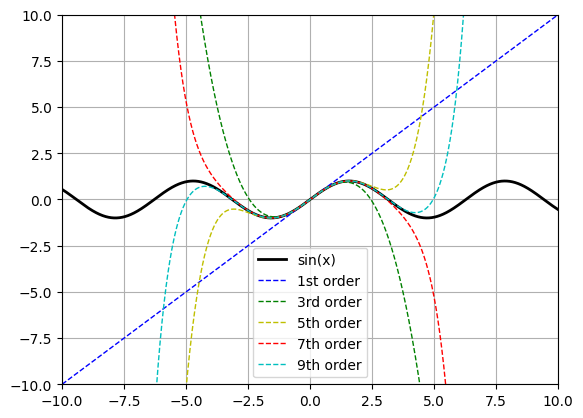

In [21]:
# Define the function to approximate
x = np.linspace(-10, 10, 2000)
y = np.sin(x)

# Set up plot
plt.plot(x, y, 'k', linewidth = 2)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)

# First order Taylor expansion
P = [1, 0] # x + 0
yT1 = np.polyval(P, x)
plt.plot(x, yT1, 'b--', linewidth = 1)

# Third order Taylor expansion
P = [-1/factorial(3), 0, 1, 0] # -(1/3!)x^3 + x + 0
yT3 = np.polyval(P, x)
plt.plot(x, yT3, 'g--', linewidth = 1)

# Fifth order Taylor expansion
P = [1/factorial(5), 0, -1/factorial(3), 0, 1, 0] #(1/5!)x^5 + 0 -(1/3!)x^3 + x + 0
yT5 = np.polyval(P, x)
plt.plot(x, yT5, 'y--', linewidth = 1)

# Seventh order Taylor expansion
P = [-1/factorial(7), 0, 1/factorial(5), 0, -1/factorial(3), 0, 1, 0] #(-1/7!)x^7 + 0 + (1/5!)x^5 + 0 - (1/3!)x^3 + x + 0
yT7 = np.polyval(P, x)
plt.plot(x, yT7, 'r--', linewidth = 1)

# Ninth order Taylor expansion
P = [1/factorial(9), 0, -1/factorial(7), 0, 1/factorial(5), 0, -1/factorial(3), 0, 1, 0] #(1/9!)x^9 + 0 - (1/7!)x^7 + 0 + (1/5!)x^5 + 0 - (1/3!)x^3 + x + 0
yT9 = np.polyval(P, x)
plt.plot(x, yT9, 'c--', linewidth = 1)

     
plt.legend(['sin(x)', '1st order', '3rd order', '5th order', '7th order', '9th order'])
plt.show()

# Modeling Exponential Decay

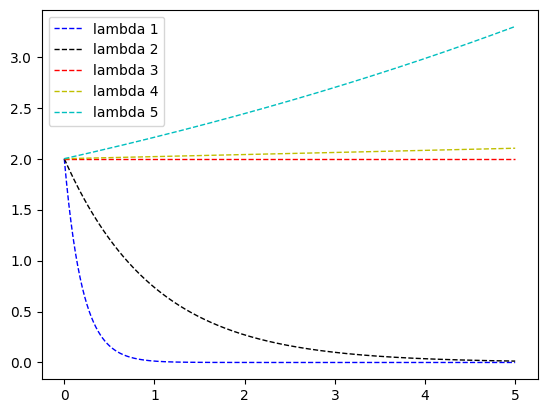

In [11]:
ROCs = [-5, -1, 0, 0.01, 0.1]
time = np.linspace(0, 5, 1000)
colors = ['b--', 'k--', 'r--', 'y--', 'c--', 'g--']
initial_value = 2

def model(ROC, time, initial_value):
    return np.exp(ROC*time) * initial_value
for i, value in enumerate(ROCs):
    values = model(ROCs[i], time, initial_value)
    plt.plot(time, values, colors[i], linewidth = 1)
plt.legend(['lambda 1', 'lambda 2', 'lambda 3', 'lambda 4', 'lambda 5'])
plt.show()

# Example 2nd Order ODE
d2x/dt(x) + 3*d/dt + 2x = 0

=> 0 = c1e^(lambda1 * t) + c2e^(lambda2 * t)

=> @ t = 0, c1 & c2 = 1

In [3]:
A = np.array([[0, 1], [-2, -3]])
np.linalg.eig(A)

(array([-1., -2.]),
 array([[ 0.70710678, -0.4472136 ],
        [-0.70710678,  0.89442719]]))

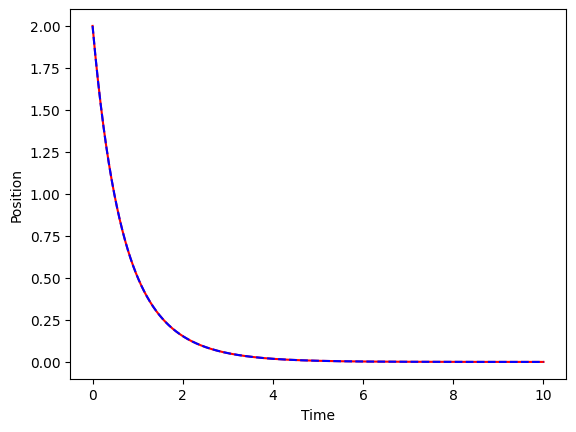

In [17]:
y0 = [2, -3]
t = np.linspace(0, 10, 1000)

analytic_sol = np.exp(-t) + np.exp(-2 * t)
plt.plot(t, analytic_sol, 'r')
plt.xlabel('Time')
plt.ylabel('Position')

linear_ODE = solve_ivp(lambda t, linear_ODE: A @ linear_ODE, (0, 10), y0, t_eval = t)
linear_ODE_sol = linear_ODE.y

plt.plot(t, linear_ODE_sol[0, :], 'b--')


# Solving Systems of Equations with Eigenvalues and Eigenvectors
Say one wants to solve a coupled differental equation...how would you do that? Recall that the simplest notation here is x dot = A (matrix of coefficients) times x

The simplest approach is to transform the A matrix into a diagonal matrix, which we do using the eigenvalues and eigenvectors of A. This allows us to compute: xdot = D (diagonal matrix) times x.

Further deriving this gives us the ability to solve for the state of the system at point t in time:

x(t) = (e^Dt)*x(0)

Some further exposition of this:

AT = TD

D = (T^-1)AT

A = TDT^-1

In [31]:
import numpy as np

In [55]:
A = np.array([[0, 1],[-2, -3]])

In [56]:
vals, vecs = np.linalg.eig(A)
print(f'Eigenvalues of A: {vals}') # Eigenvalues are the roots of the characteristic equation
print(f'Eigenvectors of A: {vecs}') 

Eigenvalues of A: [-1. -2.]
Eigenvectors of A: [[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


In [58]:
# Compute the diagonal matrix

D = np.linalg.inv(vecs) @ A @ vecs # REMEMBER, in Python the '*' operator does element-wise multiplication whereas the '@' operator performs matrix multiplication.
D

array([[-1.,  0.],
       [ 0., -2.]])

In [62]:
# Re-create A using eigs
np.rint(vecs @ D @ np.linalg.inv(vecs))

array([[ 0.,  1.],
       [-2., -3.]])